In [ ]:
# conda install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

# ML Notes

In [ ]:
# Creating multiple dummy variables
dummies = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']], drop_first=True)
df = df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

# Linea Regression

In [3]:
from sklearn.linear_model import LinearRegression

In [21]:
from sklearn import metrics

In [4]:
df = pd.read_csv('USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']] # Features or Predictors
y = df['Price'] # Response # The Address column is string and isn't used

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [7]:
lm = LinearRegression() # Instanciating the model - creating a Linear Regression object

In [8]:
lm.fit(X_train, y_train) # Fitting training data to the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(lm.intercept_)

-2640159.796851911


In [10]:
lm.coef_ # Coefficients of each feature

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [11]:
cdf = pd.DataFrame(data=lm.coef_ , index=X.columns, columns=['Coeff'])
cdf 
#This means:other features being fixed, 1 unit increase in Ave.AreaIncome is associated with increase of 21.52 unit in Price

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [12]:
predictions = lm.predict(X_test) # Model predicted values

In [13]:
from sklearn import metrics

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions)) # Mean Absolute Error (MAE) is the mean of the absolute value of the errors
print('MSE:', metrics.mean_squared_error(y_test, predictions)) # Mean Squared Error (MSE) is the mean of the squared errors
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) # Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors

MAE: 82288.22251914957
MSE: 10460958907.209507
RMSE: 102278.82922291156


# Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [27]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [5]:
train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


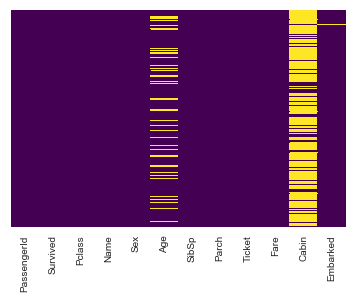

In [6]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [7]:
def impute_age(cols): # cols is a 1x2 matrix
# Replacing missing Age values with average Age depending on the PassengerClass
    Age = cols[0] # is just one number, not a vector/matrix
    Pclass = cols[1]    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return train.groupby('Pclass').mean()['Age'].loc[1]
        elif Pclass == 2:
            return train.groupby('Pclass').mean()['Age'].loc[2]
        else:
            return train.groupby('Pclass').mean()['Age'].loc[3]
        
    else:
        return Age

In [8]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [9]:
train.drop('Cabin',axis=1,inplace=True)

In [11]:
train.dropna(inplace=True)

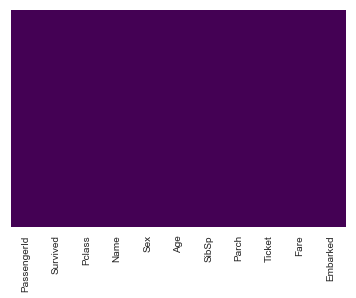

In [12]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [13]:
sex = pd.get_dummies(train['Sex'], drop_first=True)
# Keep only one column, to avoid multi-colinearity, beacuse female column can be perfect predictor of male column
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [14]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
# Embark can be C, Q, S - by dropping one of them (C) we can avoid multi-colinearity
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [15]:
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [17]:
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True)
train.drop('PassengerId', axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [18]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [24]:
logmodel = LogisticRegression()

logmodel.fit(X_train, y_train)

predictions = logmodel.predict(X_test)

C:\Users\uranu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print( classification_report(y_test, predictions) ) # Reports the precision, recal, f1-score ect based on Confusion Matrix

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



Precision or positive predictive value (PPV):  PPV = TP/(TP + FP) = 1 - FDR

Recall, sensitivity, hit rate, or true positive rate (TPR): TPR = TP/P = TP/(TP+FN) = 1 - FNR

Accuracy (ACC) = (TP+TN)/(P+N) = (TP+TN)/(TP+TN+FP+FN)

F1 score is the harmonic mean of precision and sensitivity: F1 = 2 * (PPV.TPR)/(PPV+TPR)

In [28]:
confusion_matrix(y_test, predictions) # Reports the Confusion Matrix ([[tn, fp], [fn, tp]])

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [29]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
tn, fp, fn, tp

(148, 15, 36, 68)

# K Nearest Neighbors (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
df = pd.read_csv('Classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [35]:
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1)) # Train the scaler model on all columns except for the last one
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1)) # transform(normalize the data)

In [36]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [37]:
df_feat.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.394440e-16,-2.658984e-16,-9.992007e-17,-1.432188e-16,-6.134537e-16,2.486900e-17,6.682432e-16,-4.778400e-16,3.358980e-16,4.650169e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.678050e+00,-2.618747e+00,-2.275858e+00,-2.775551e+00,-2.947206e+00,-2.660802e+00,-2.620466e+00,-2.674465e+00,-2.701361e+00,-3.542140e+00
25%,-7.161683e-01,-6.702761e-01,-7.504105e-01,-7.279635e-01,-6.637361e-01,-7.127975e-01,-7.020467e-01,-7.120098e-01,-7.626629e-01,-6.863610e-01
50%,-3.180217e-02,1.628137e-02,-7.159299e-02,-2.293699e-02,1.433731e-02,-7.940354e-03,-7.093937e-02,-2.236584e-02,2.488297e-02,6.194010e-02
75%,7.378939e-01,7.534412e-01,6.664646e-01,6.631695e-01,6.820374e-01,7.012930e-01,6.723000e-01,7.311915e-01,7.661087e-01,6.961851e-01
max,2.667092e+00,2.799904e+00,3.049325e+00,4.151021e+00,2.538987e+00,2.825739e+00,2.940974e+00,2.470109e+00,2.477734e+00,2.602476e+00


In [38]:
X = df_feat
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
# Start with K = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [40]:
pred = knn.predict(X_test)

In [41]:
print( confusion_matrix(y_test, pred) )
print( classification_report(y_test, pred) )

[[151   8]
 [ 15 126]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



In [42]:
# Use Elbow method to choose a K value
error_rate=[]

for ii in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = ii)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean( pred_i != y_test )) # Average Error Rate

Text(0, 0.5, 'Error Rate')

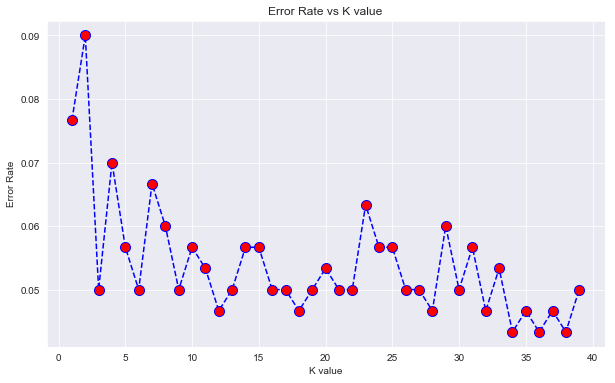

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='b', linestyle='dashed', 
         marker='o', markerfacecolor='r', markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

In [44]:
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print( confusion_matrix(y_test, pred) )
print('\n')
print( classification_report(y_test, pred) )

[[153   6]
 [  9 132]]


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       159
           1       0.96      0.94      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## Decision Trees and Random Forest

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [45]:
df = pd.read_csv('kyphosis.csv')
# Age in month #Number= Number of vertebrae involved in the operation # Start= Number of most vertebrae that operated on
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [46]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [49]:
dtree = DecisionTreeClassifier()

In [50]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [51]:
predictions = dtree.predict(X_test)

In [52]:
print(confusion_matrix(y_test, predictions))
print('\n')
print(classification_report(y_test, predictions))

[[15  5]
 [ 4  1]]


              precision    recall  f1-score   support

      absent       0.79      0.75      0.77        20
     present       0.17      0.20      0.18         5

    accuracy                           0.64        25
   macro avg       0.48      0.47      0.48        25
weighted avg       0.66      0.64      0.65        25



In [53]:
rfc = RandomForestClassifier(n_estimators = 200)

In [54]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
rfc_pred = rfc.predict(X_test)

In [56]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[18  2]
 [ 4  1]]


              precision    recall  f1-score   support

      absent       0.82      0.90      0.86        20
     present       0.33      0.20      0.25         5

    accuracy                           0.76        25
   macro avg       0.58      0.55      0.55        25
weighted avg       0.72      0.76      0.74        25



In [57]:
loans = pd.read_csv('loan_data.csv')
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


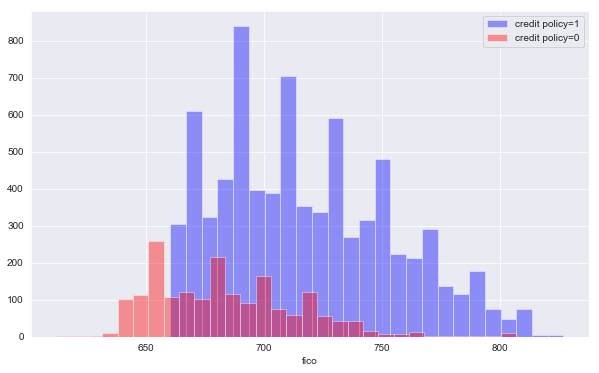

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(loans[loans['credit.policy']==1]['fico'], kde=False, bins=30, color='b', label='credit policy=1')
sns.distplot(loans[loans['credit.policy']==0]['fico'], kde=False, bins=30, color='r', label='credit policy=0')
plt.legend()

In [60]:
cat_feats = ['purpose'] # Categorical Features 
final_data = pd.get_dummies(loans, columns=cat_feats, drop_first=True)
# Keep only one column, to avoid multi-colinearity, beacuse female column can be perfect predictor of male column
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [61]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
preds = dtree.predict(X_test)

print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))

[[1983  448]
 [ 335  108]]


              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.24      0.22       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874

